In [1]:
import config
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from random import randint
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import pickle

In [88]:
feat_df = pd.read_csv("song_feat.csv")
song_dets = pd.read_csv("songs.csv", index_col=0)

In [90]:

song_dets

,song_name,song_id,song_artist,album_name
0,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,"['Sam Smith', 'Kim Petras']",Unholy (feat. Kim Petras)
1,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,['Taylor Swift'],Midnights
2,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,"['Drake', '21 Savage']",Her Loss
3,As It Was,4Dvkj6JhhA12EX05fT7y2e,['Harry Styles'],Harry's House
4,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,"['David Guetta', 'Bebe Rexha']",I'm Good (Blue)
...,...,...,...,...
8092,"Would've, Could've, Should've",3pUa0ZxdSeaJXm0EIydD3F,['Taylor Swift'],Midnights (3am Edition)
8093,Labyrinth,0A1JLUlkZkp2EFrosoNQi0,['Taylor Swift'],Midnights
8094,Broke Boys,45pUWUeEWGoSdH6UF162G8,"['Drake', '21 Savage']",Her Loss
8095,Sweet Nothing,0wavGRldH0AWyu2zvTz8zb,['Taylor Swift'],Midnights


In [45]:
feat_df_sh = pd.concat([feat_df.iloc[ :-1,1:12], feat_df.iloc[ :-1,-2:-1]], axis=1)
feat_df_sh

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.714,0.472,2.0,-7.375,1.0,0.0864,0.01300,0.000005,0.266,0.238,131.121,4.0
1,0.637,0.643,4.0,-6.571,1.0,0.0519,0.13000,0.000002,0.142,0.533,97.008,4.0
2,0.561,0.520,11.0,-9.342,0.0,0.2440,0.05030,0.000002,0.355,0.424,153.150,3.0
3,0.520,0.731,6.0,-5.338,0.0,0.0557,0.34200,0.001010,0.311,0.662,173.930,4.0
4,0.561,0.965,7.0,-3.673,0.0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8083,0.734,0.605,1.0,-8.476,1.0,0.0699,0.01020,0.000000,0.317,0.252,103.976,4.0
8084,0.603,0.784,6.0,-4.023,1.0,0.0620,0.44600,0.000008,0.119,0.769,172.041,4.0
8085,0.488,0.832,0.0,-6.508,1.0,0.1140,0.42400,0.002880,0.139,0.554,157.984,4.0
8086,0.406,0.306,0.0,-15.480,1.0,0.0517,0.78500,0.488000,0.122,0.122,110.014,4.0


In [5]:
feat_df_sh.dropna(inplace=True)

In [6]:
scaler = StandardScaler()
scaler.fit(feat_df_sh)
audio_features_scaled = scaler.transform(feat_df_sh)
audio_features_scaled

array([[ 0.66420157, -0.74734321, -0.91799514, ..., -1.04781123,
         0.39497212,  0.14996462],
       [ 0.18065035, -0.0141488 , -0.35844536, ...,  0.15732929,
        -0.91215199,  0.14996462],
       [-0.29662098, -0.54153425,  1.59997887, ..., -0.28795992,
         1.23906782, -3.11015344],
       ...,
       [-0.75505266,  0.79622396, -1.47754492, ...,  0.24311896,
         1.42429451,  0.14996462],
       [-1.27000331, -1.45909918, -1.47754492, ..., -1.521697  ,
        -0.41379488,  0.14996462],
       [ 0.21204978, -0.48579433, -0.91799514, ..., -1.56254922,
        -0.02958553,  0.14996462]])

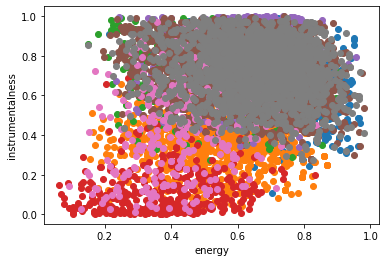

In [7]:
kmeans = KMeans(n_clusters=8, random_state=321)
kmeans.fit(audio_features_scaled)
# assign a cluster to each example
labels = kmeans.predict(audio_features_scaled)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(feat_df_sh.to_numpy()[row_ix, 0], feat_df_sh.to_numpy()[row_ix,1])
    pyplot.xlabel("energy")
    pyplot.ylabel("instrumentalness")
    # show the plot
pyplot.show()

In [8]:
pd.DataFrame(audio_features_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03,8.087000e+03
mean,-1.598957e-16,-3.047038e-17,1.456593e-16,-1.675202e-16,2.784934e-15,-2.932406e-17,-1.009579e-15,-7.193345e-15,1.320681e-17,-2.060372e-16,-4.422998e-16,9.243118e-16
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-3.417096e+00,-2.759340e+00,-1.477545e+00,-7.386958e+00,-1.201948e+00,-7.061487e-01,-8.106470e-01,-4.272925e-01,-1.082319e+00,-1.899580e+00,-2.837720e+00,-9.630390e+00
25%,-6.482946e-01,-5.586850e-01,-9.179951e-01,-2.957311e-01,-1.201948e+00,-5.304476e-01,-7.467517e-01,-4.272925e-01,-6.019327e-01,-7.904422e-01,-7.329411e-01,1.499646e-01
50%,1.241314e-01,2.045232e-01,-7.867047e-02,2.690951e-01,8.319826e-01,-3.792930e-01,-4.795026e-01,-4.271594e-01,-4.025578e-01,-1.994368e-03,4.620644e-02,1.499646e-01
75%,7.332803e-01,7.704978e-01,7.606542e-01,6.189702e-01,8.319826e-01,4.407257e-03,4.057808e-01,-3.825564e-01,2.869605e-01,7.741978e-01,5.128175e-01,1.499646e-01
max,2.334651e+00,1.512268e+00,1.599979e+00,1.760055e+00,8.319826e-01,8.602135e+00,2.504169e+00,3.214446e+00,5.269706e+00,2.020191e+00,3.466080e+00,3.410083e+00


In [9]:
kmean = KMeans(n_clusters=8, random_state=123)
kmean.fit(audio_features_scaled)

KMeans(random_state=123)

In [15]:
#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_8.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [83]:
len(kmean.labels_)


8087

In [12]:
kmeans.inertia_

52183.842900032585

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

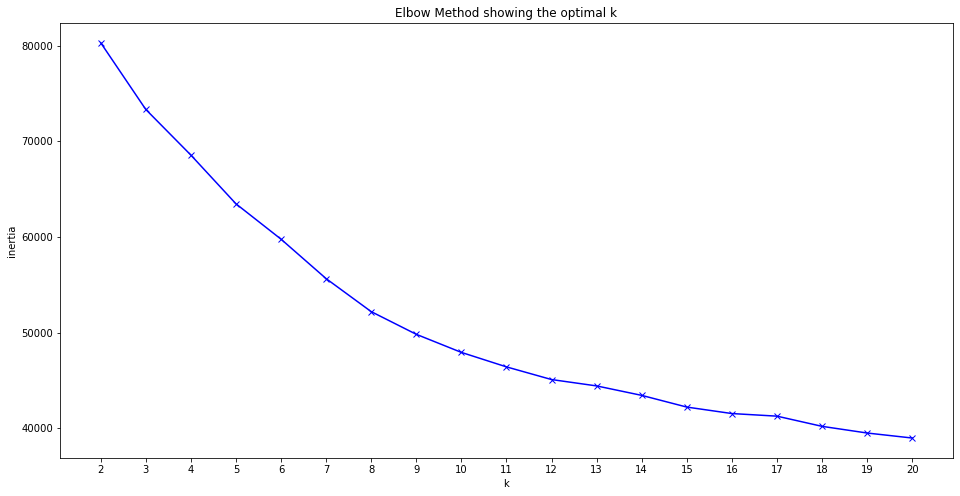

In [13]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

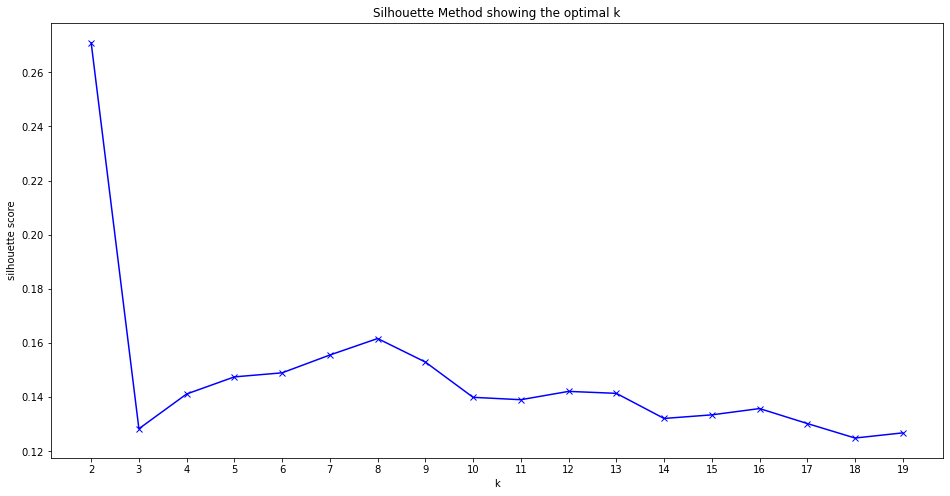

In [14]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(audio_features_scaled, kmeans.predict(audio_features_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [94]:
song_cluster = pd.DataFrame(kmean.labels_, columns=["cluster"])
song_dets_clust = song_dets.merge(song_cluster,left_index=True, right_index=True)
song_dets_clust.cluster.value_counts()
song_dets_clust

,song_name,song_id,song_artist,album_name,cluster
0,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,"['Sam Smith', 'Kim Petras']",Unholy (feat. Kim Petras),4
1,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,['Taylor Swift'],Midnights,4
2,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,"['Drake', '21 Savage']",Her Loss,2
3,As It Was,4Dvkj6JhhA12EX05fT7y2e,['Harry Styles'],Harry's House,1
4,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,"['David Guetta', 'Bebe Rexha']",I'm Good (Blue),1
...,...,...,...,...,...
8082,Wonderful Dream (Holidays Are Coming) - Radio ...,0SvD6EdetxVtXei2JhkV4B,['Melanie Thornton'],Ready To Fly,4
8083,Driving Home for Christmas - 2019 Remaster,27qAMKrDdKEs8HDXcvR24R,['Chris Rea'],"Dancing with Strangers (Deluxe Edition, 2019 R...",4
8084,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,['Zach Bryan'],Something in the Orange,4
8085,On BS,34tz0eDhGuFErIuW3q4mPX,"['Drake', '21 Savage']",Her Loss,5


In [95]:
song_dets_clust.to_csv("song_dets_clust.csv")